<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,550.999871,681.964409,-117.571437,799.535847
1,0.0,1.0,91.836721,66.187383,-4557.192558,-4389.168454,-758.876834,-3630.291620
2,0.0,2.0,43.398567,38.309032,806.409777,898.117376,393.519975,504.597400
3,0.0,3.0,73.960630,22.781469,71.971171,178.713270,353.593215,-174.879945
4,0.0,4.0,98.540837,89.850536,-3339.254209,-3140.862837,-1329.316335,-1811.546502
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-358.818194,-267.514822,348.940392,-616.455214
19996,999.0,16.0,73.135408,86.171748,-281.333648,-112.026492,-235.040766,123.014274
19997,999.0,17.0,82.400084,40.066726,1835.762322,1968.229132,728.220545,1240.008587
19998,999.0,18.0,65.243162,88.001906,5364.731789,5527.976856,-370.589171,5898.566027


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,550.999871,681.964409,-117.571437,799.535847
1,0.0,1.0,91.836721,66.187383,-4557.192558,-4389.168454,-758.876834,-3630.291620
2,0.0,2.0,43.398567,38.309032,806.409777,898.117376,393.519975,504.597400
3,0.0,3.0,73.960630,22.781469,71.971171,178.713270,353.593215,-174.879945
4,0.0,4.0,98.540837,89.850536,-3339.254209,-3140.862837,-1329.316335,-1811.546502
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-358.818194,-267.514822,348.940392,-616.455214
19996,999.0,16.0,73.135408,86.171748,-281.333648,-112.026492,-235.040766,123.014274
19997,999.0,17.0,82.400084,40.066726,1835.762322,1968.229132,728.220545,1240.008587
19998,999.0,18.0,65.243162,88.001906,5364.731789,5527.976856,-370.589171,5898.566027


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    77.493350  43.471189   550.999871   681.964409  -117.571437   
      1.0    91.836721  66.187383 -4557.192558 -4389.168454  -758.876834   
      2.0    43.398567  38.309032   806.409777   898.117376   393.519975   
      3.0    73.960630  22.781469    71.971171   178.713270   353.593215   
      4.0    98.540837  89.850536 -3339.254209 -3140.862837 -1329.316335   
...                ...        ...          ...          ...          ...   
999.0 15.0   46.138603  35.164769  -358.818194  -267.514822   348.940392   
      16.0   73.135408  86.171748  -281.333648  -112.026492  -235.040766   
      17.0   82.400084  40.066726  1835.762322  1968.229132   728.220545   
      18.0   65.243162  88.001906  5364.731789  5527.976856  -370.589171   
      19.0   73.974682  52.585818  -672.518830  -535.958331   390.233813   

                   e_hat  
rep   index               
0.0   0.0     799.535847  
      1.0   -3630.291620  
      2.0     504.597400  
      3.0    -174.879945  
      4.0   -1811.546502  
...                  ...  
999.0 15.0   -616.455214  
      16.0    123.014274  
      17.0   1240.008587  
      18.0   5898.566027  
      19.0   -926.192144  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    77.493350  43.471189   550.999871   681.964409  -117.571437   
      1.0    91.836721  66.187383 -4557.192558 -4389.168454  -758.876834   
      2.0    43.398567  38.309032   806.409777   898.117376   393.519975   
      3.0    73.960630  22.781469    71.971171   178.713270   353.593215   
      4.0    98.540837  89.850536 -3339.254209 -3140.862837 -1329.316335   
...                ...        ...          ...          ...          ...   
999.0 15.0   46.138603  35.164769  -358.818194  -267.514822   348.940392   
      16.0   73.135408  86.171748  -281.333648  -112.026492  -235.040766   
      17.0   82.400084  40.066726  1835.762322  1968.229132   728.220545   
      18.0   65.243162  88.001906  5364.731789  5527.976856  -370.589171   
      19.0   73.974682  52.585818  -672.518830  -535.958331   390.233813   

                   e_hat  
rep   index               
0.0   0.0     799.535847  
      1.0   -3630.291620  
      2.0     504.597400  
      3.0    -174.879945  
      4.0   -1811.546502  
...                  ...  
999.0 15.0   -616.455214  
      16.0    123.014274  
      17.0   1240.008587  
      18.0   5898.566027  
      19.0   -926.192144  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,550.999871,681.964409,-117.571437,799.535847
1,0.0,1.0,91.836721,66.187383,-4557.192558,-4389.168454,-758.876834,-3630.291620
2,0.0,2.0,43.398567,38.309032,806.409777,898.117376,393.519975,504.597400
3,0.0,3.0,73.960630,22.781469,71.971171,178.713270,353.593215,-174.879945
4,0.0,4.0,98.540837,89.850536,-3339.254209,-3140.862837,-1329.316335,-1811.546502
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-358.818194,-267.514822,348.940392,-616.455214
19996,999.0,16.0,73.135408,86.171748,-281.333648,-112.026492,-235.040766,123.014274
19997,999.0,17.0,82.400084,40.066726,1835.762322,1968.229132,728.220545,1240.008587
19998,999.0,18.0,65.243162,88.001906,5364.731789,5527.976856,-370.589171,5898.566027


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    77.493350  43.471189   550.999871   681.964409  -117.571437   
      1.0    91.836721  66.187383 -4557.192558 -4389.168454  -758.876834   
      2.0    43.398567  38.309032   806.409777   898.117376   393.519975   
      3.0    73.960630  22.781469    71.971171   178.713270   353.593215   
      4.0    98.540837  89.850536 -3339.254209 -3140.862837 -1329.316335   
...                ...        ...          ...          ...          ...   
999.0 15.0   46.138603  35.164769  -358.818194  -267.514822   348.940392   
      16.0   73.135408  86.171748  -281.333648  -112.026492  -235.040766   
      17.0   82.400084  40.066726  1835.762322  1968.229132   728.220545   
      18.0   65.243162  88.001906  5364.731789  5527.976856  -370.589171   
      19.0   73.974682  52.585818  -672.518830  -535.958331   390.233813   

                   e_hat  
rep   index               
0.0   0.0     799.535847  
      1.0   -3630.291620  
      2.0     504.597400  
      3.0    -174.879945  
      4.0   -1811.546502  
...                  ...  
999.0 15.0   -616.455214  
      16.0    123.014274  
      17.0   1240.008587  
      18.0   5898.566027  
      19.0   -926.192144  

[20000 rows x 6 columns]

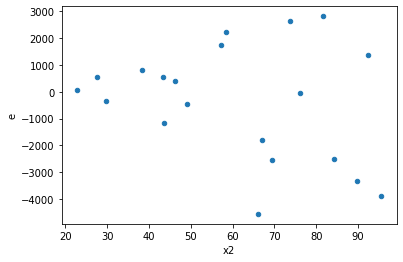

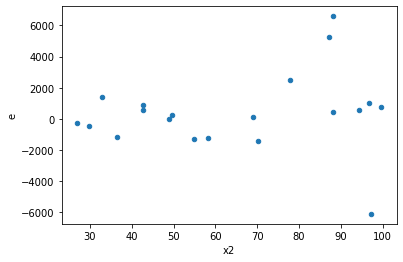

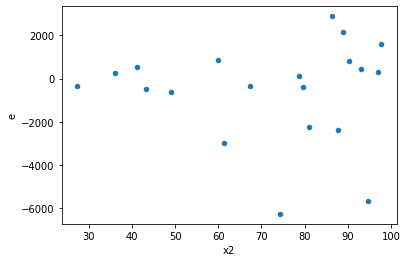

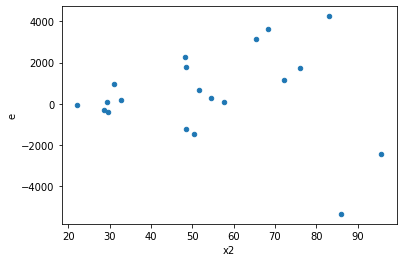

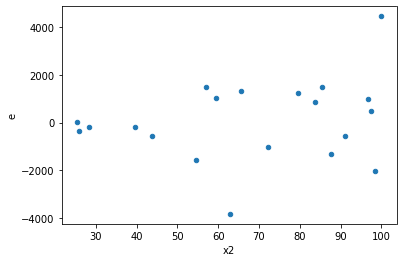

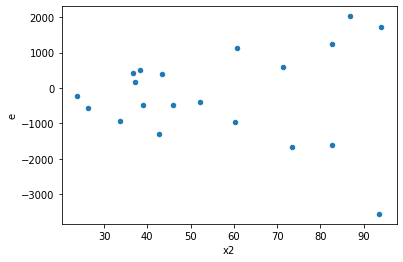

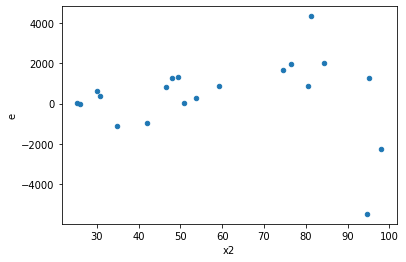

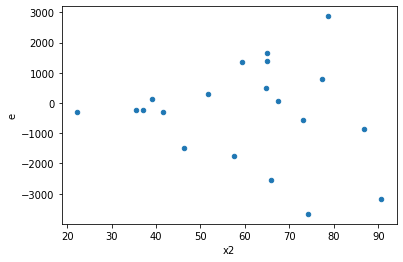

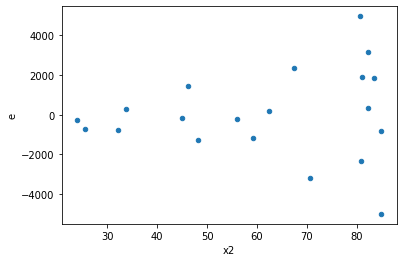

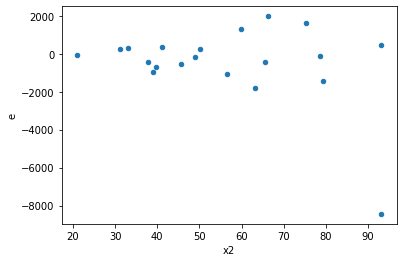

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,5494595.853739154,95382294.37732962,915765.9756231923,15897049.06288827,17.359292096509805,0.0029736280899252954,0.9985131859550374,0.0014868140449626477,Reject001=0 : Heteroscedasticity
3.0,6.0,6.0,20089527.044239476,56725786.57781532,3348254.507373246,9454297.76296922,2.8236496784069898,0.23209656818100477,0.8839517159094976,0.11604828409050238,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,13026685.997254884,25167129.875629425,2171114.332875814,4194521.645938237,1.931967184971903,0.4429331961500629,0.7785334019249686,0.22146659807503144,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,4065653.2128294553,7403565.893051997,677608.8688049092,1233927.6488419995,1.8210028021301776,0.48434452693527175,0.7578277365323641,0.24217226346763587,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,8332141.879564311,66602135.65456209,1388690.3132607185,11100355.942427015,7.9933991304099985,0.023113350750674666,0.9884433246246627,0.011556675375337333,Reject001=1 : Homoscedasticity
10.0,6.0,6.0,703892.7247936473,64383348.48795735,117315.45413227455,10730558.081326226,91.46755779700939,2.48879977400307e-05,0.99998755600113,1.244399887001535e-05,Reject001=0 : Heteroscedasticity
13.0,6.0,6.0,11482723.339854918,15478453.531797381,1913787.223309153,2579742.2552995635,1.3479775723650718,0.7261613084491925,0.6369193457754038,0.36308065422459623,Reject001=1 : Homoscedasticity
20.0,6.0,6.0,2639358.7392117837,7830228.481559618,439893.12320196396,1305038.0802599364,2.9667162577141872,0.21148079025057465,0.8942596048747127,0.10574039512528732,Reject001=1 : Homoscedasticity
22.0,6.0,6.0,17453282.587442104,18951044.006222665,2908880.4312403505,3158507.334370444,1.085815456850405,0.9229450051331962,0.5385274974334019,0.4614725025665981,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,54139290.20769311,10204653.738879414,9023215.034615519,1700775.6231465691,0.18848887193998248,0.06200599461149722,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,5494595.853739154,95382294.37732962,915765.9756231923,15897049.06288827,17.359292096509805,0.0029736280899252954,Reject001=0 : Heteroscedasticity
2.0,6.0,6.0,53070563.12163878,30332142.863664422,8845093.853606464,5055357.143944071,0.5715436407588619,0.5135771364045666,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,20089527.044239476,56725786.57781532,3348254.507373246,9454297.76296922,2.8236496784069898,0.23209656818100477,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,13026685.997254884,25167129.875629425,2171114.332875814,4194521.645938237,1.931967184971903,0.4429331961500629,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,4065653.2128294553,7403565.893051997,677608.8688049092,1233927.6488419995,1.8210028021301776,0.48434452693527175,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,50911861.39100646,2225363.669357978,8485310.23183441,370893.9448929963,0.04371012193537843,0.0013783105057761013,Reject001=0 : Heteroscedasticity
7.0,6.0,6.0,12611447.94946861,5718061.034016775,2101907.9915781016,953010.1723361291,0.4534024211119793,0.3585160525812645,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,8332141.879564311,66602135.65456209,1388690.3132607185,11100355.942427015,7.9933991304099985,0.023113350750674666,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      655
Reject001=0 : Heteroscedasticity    345
Name: Result_test, dtype: int64